In [2]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('NaiveBayes.csv')
df.head()

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
# split the data into inputs and outputs

X = df.iloc[:, [0,1]].values
y = df.iloc[:, 2].values


In [5]:
# training and testing data
from sklearn.model_selection import train_test_split
#assign test data size 25%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [6]:
# importing standard scaler
from sklearn.preprocessing import StandardScaler
#scalling the input data
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [7]:
#Bernoulli NB

# importing classifier
from sklearn.naive_bayes import BernoulliNB
# initializaing the NB
classifer = BernoulliNB()
# training the model
classifer.fit(X_train, y_train)
# testing the model
y_pred = classifer.predict(X_test)

In [8]:
#importing accurancy score 
from sklearn.metrics import accuracy_score
#printing the accurancy of the model 
print(accuracy_score(y_pred, y_test))

0.8


In [9]:
# Gaussian NB

# import Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
# create a Gaussian Classifier
classifer1 = GaussianNB()
# training the model
classifer1.fit(X_train, y_train)
# testing the model
y_pred1 = classifer1.predict(X_test)


In [10]:
# printing the accurancy of the model
# (comme avant avec Bernoulli(0.8))

print(accuracy_score(y_test,y_pred1))

0.91


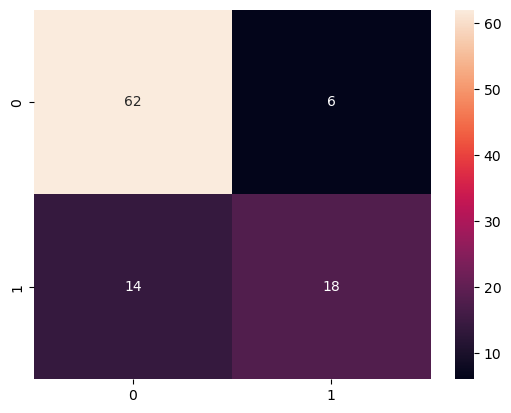

In [11]:
# confusion matrix(Bernoulli)
# matrice rapresentant les valeurs reelles et predite

# importing the required modules
import seaborn as sns
from sklearn.metrics import confusion_matrix

# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred)
# true write data values in each cell of the matrix
sns.heatmap(cm, annot=True)
plt.savefig('confusion.png')



In [12]:
# classification report(Bernoulli)

# importing classification report
from sklearn.metrics import classification_report
# printing the report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        68
           1       0.75      0.56      0.64        32

    accuracy                           0.80       100
   macro avg       0.78      0.74      0.75       100
weighted avg       0.79      0.80      0.79       100



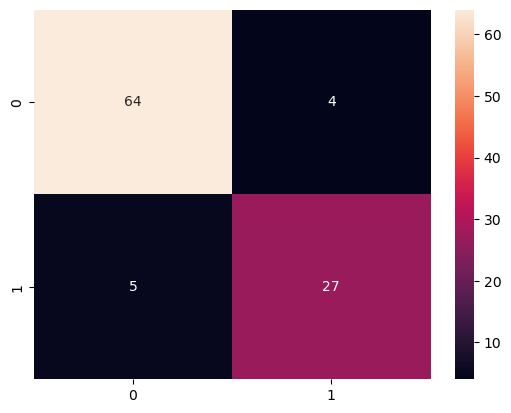

In [13]:
#confusion matrix(gaussien)

# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred1)
# true write data values in each cell of the matrix
sns.heatmap(cm,annot=True)
plt.savefig('confusion.png')

In [14]:
#classification report(gaussien)


print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93        68
           1       0.87      0.84      0.86        32

    accuracy                           0.91       100
   macro avg       0.90      0.89      0.90       100
weighted avg       0.91      0.91      0.91       100



Dans la vie réelle, les données ne sont pas toujours constituées de valeurs numériques. Par exemple, ou ne sont pas des valeurs numériques. Dans de tels scénarios, nous devons convertir les données non numériques en valeurs numériques avant d’alimenter notre modèle. Par exemple, nous avons l’ensemble de données suivant sur le fait que les joueurs feront du sport ou non, en fonction de la météo et de la température.playingnot playing

In [15]:
#sample data set 

# assigning features and label variables
weather = ['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny', 'Rainy','Sunny','Overcast','Overcast','Rainy']
# output class
play = ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

Remarque : l’entrée et la sortie ne sont pas des valeurs numériques. Avant d’alimenter notre modèle en ces données, nous devons encoder les valeurs non numériques en valeurs numériques. par exemple. C’est ce qu’on appelle l’encodage d’étiquettes.Overcast = 0Rainy = 1Sunny = 2

In [17]:
#encoding(weather)

# Import LabelEncoder
from sklearn import preprocessing
# creating LabelEncoder
labelCode = preprocessing.LabelEncoder()
# Converting string labels into numbers.
wheather_encoded=labelCode.fit_transform(weather)
print(wheather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [18]:
#encoding(play)

# creating LabelEncoder
labelCode = preprocessing.LabelEncoder()
# converting string labels into numbers.
label=labelCode.fit_transform(play)
print(label)

[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


Nous devons donc convertir nos données dans le tableau 2D avant de les introduire dans notre modèle

In [20]:
#converting array

# importing numpy module
import numpy as np
# converting 1D array to 2D
weather_2d = np.reshape(wheather_encoded, (-1, 1))

In [21]:
#training model

# import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
# create a Gaussian Classifier
model = GaussianNB()
# train the model using the training sets
model.fit(weather_2d, label)

GaussianNB()

In [22]:
# predicting the odel
predicted= model.predict([[0]]) # 0:Overcast
# printing predicted value
print(predicted)

[1]


Classification bayésienne naïve avec plusieurs étiquettes


In [23]:
# import scikit-learn dataset library
from sklearn import datasets
# load dataset
dataset = datasets.load_wine()

In [24]:
# print the names of the 13 features
print ("Inputs: ", dataset.feature_names)
# print the label type of wine
print ("Outputs: ", dataset.target_names)

Inputs:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Outputs:  ['class_0' 'class_1' 'class_2']


In [25]:
# print the wine data features
print(dataset.data[0:3])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]]


In [26]:
# print the wine labels 
print(dataset.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [27]:
#splitting dataset

# import train_test_split function
from sklearn.model_selection import train_test_split
# input and outputs
inputs = dataset.data
outputs = dataset.target
# split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.3, random_state=1)

In [28]:
#training model

# import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
# create a Gaussian Classifier
classifer = GaussianNB()
# train the model using the training sets
classifer.fit(X_train, y_train)
# predict the response for test dataset
y_pred = classifer.predict(X_test)

In [29]:
#accurancy

# import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# printing accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9814814814814815


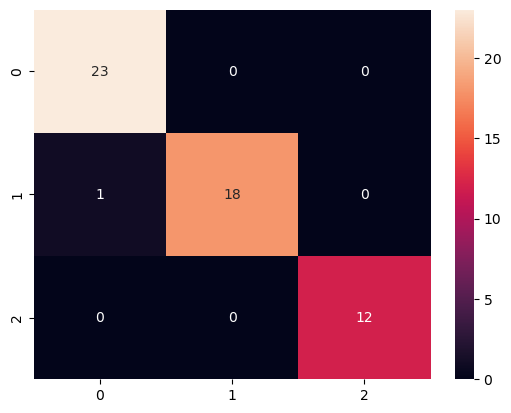

In [30]:
#confusion matrix

# importing the required modules
import seaborn as sns
from sklearn.metrics import confusion_matrix
# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred)
# true Write data values in each cell of the matrix
sns.heatmap(cm, annot=True)
plt.savefig('confusion.png')

In [31]:
#classification score

# Importing classification report
from sklearn.metrics import classification_report
# printing the report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.95      0.97        19
           2       1.00      1.00      1.00        12

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [32]:
#naive bayes classifier

# importring modules
import matplotlib.pyplot as plt
import pandas as pd
# importing the dataset
dataset = pd.read_csv('NaiveBayes.csv')
# split the data into inputs and outputs
X = dataset.iloc[:, [0,1]].values
y = dataset.iloc[:, 2].values
# training and testing data
from sklearn.model_selection import train_test_split
# assign test data size 25%
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.25, random_state=0)
# importing StandardScaler
from sklearn.preprocessing import StandardScaler
# scalling the input data
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
# importing bernoulli NB
from sklearn.naive_bayes import BernoulliNB
# initializaing the NB
classifer=BernoulliNB()
# training the model
classifer.fit(X_train, y_train)
# testing the model
y_pred = classifer.predict(X_test)
# importing accuracy score
from sklearn.metrics import accuracy_score
# printing the accuracy of the model
print(accuracy_score(y_test, y_pred))

0.8


Résumé
La classification bayésienne naïve est un algorithme d’apprentissage automatique supervisé utilisé pour classer en fonction de calculs de probabilité et de probabilités conditionnelles. Il en existe trois types principaux ; Classificateur gaussien, Casslifier de Bernoulli et classificateur multinomial, et est utilisé par diverses applications de différentes industries, y compris les affaires, la santé, la technologie, l’environnement, etc.